---

## 1  Kütüphaneleri İçe Aktar

In [11]:
# Gerekli kütüphaneleri içe aktar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import warnings
warnings.filterwarnings('ignore')

print(" Tüm kütüphaneler başarıyla yüklendi!")

 Tüm kütüphaneler başarıyla yüklendi!


---

## 2️ Kampüs Durakları - Koordinatlar

In [12]:
# SDÜ Kampüsü'ndeki 10 durak
# Koordinat Formatı: [Enlem, Boylam]

CAMPUS_STOPS = {
    "1. Rektörlük": [37.8290, 30.5165],
    "2. Mühendislik Fakültesi": [37.8350, 30.5290],
    "3. Fen-Edebiyat Fakültesi": [37.8320, 30.5320],
    "4. Tıp Fakültesi": [37.8260, 30.5395],
    "5. Merkez Yemekhane": [37.8300, 30.5330],
    "6. KYK Yurtları": [37.8220, 30.5350],
    "7. Spor Bilimleri Fakültesi": [37.8280, 30.5345],
    "8. Teknokent": [37.8360, 30.5140],
    "9. Mediko-Sosyal": [37.8295, 30.5310],
    "10. Kütüphane": [37.8315, 30.5320],
}

# DataFrame oluştur
df_stops = pd.DataFrame.from_dict(CAMPUS_STOPS, orient='index', columns=['Enlem', 'Boylam'])
df_stops.index.name = 'Durak'

print(f"📍 Toplam Durak Sayısı: {len(CAMPUS_STOPS)}\n")
print(df_stops)
print("\n Duraklar başarıyla yüklendi!")

📍 Toplam Durak Sayısı: 10

                               Enlem   Boylam
Durak                                        
1. Rektörlük                 37.8290  30.5165
2. Mühendislik Fakültesi     37.8350  30.5290
3. Fen-Edebiyat Fakültesi    37.8320  30.5320
4. Tıp Fakültesi             37.8260  30.5395
5. Merkez Yemekhane          37.8300  30.5330
6. KYK Yurtları              37.8220  30.5350
7. Spor Bilimleri Fakültesi  37.8280  30.5345
8. Teknokent                 37.8360  30.5140
9. Mediko-Sosyal             37.8295  30.5310
10. Kütüphane                37.8315  30.5320

 Duraklar başarıyla yüklendi!


---

## 3️ Haversine Formülü - Mesafe Hesaplama

In [13]:
def haversine_distance(coord1, coord2):
    """
    Haversine formülü ile iki koordinat arasındaki mesafeyi hesapla.
    
    Formül:
    d = 2R * arcsin(sqrt(sin²(Δφ/2) + cos(φ1) * cos(φ2) * sin²(Δλ/2)))
    
    R: Dünya'nın yarıçapı (6371 km)
    
    Args:
        coord1, coord2: [Enlem, Boylam]
    
    Returns:
        float: Mesafe (metre)
    """
    
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    # Dünya'nın yarıçapı (metre)
    R = 6371000
    
    # Açıları radyana çevir
    lat1_rad = np.radians(lat1)
    lat2_rad = np.radians(lat2)
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    
    # Haversine formülü
    a = np.sin(dlat/2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Kuş uçuşu mesafesi
    straight_distance = R * c
    
    # Kampüs içi taşıt mesafesi (kuş uçuşu × 1.35)
    return straight_distance * 1.35

# Test et
test_dist = haversine_distance(CAMPUS_STOPS["1. Rektörlük"], CAMPUS_STOPS["2. Mühendislik Fakültesi"])
print(f" Rektörlük → Mühendislik Fakültesi: {test_dist/1000:.3f} km ({test_dist:.0f} m)")

 Rektörlük → Mühendislik Fakültesi: 1.734 km (1734 m)


---

## 4️ Mesafe Matrisi Oluşturma

In [14]:
# Mesafe matrisi hesapla
n_stops = len(CAMPUS_STOPS)
names = list(CAMPUS_STOPS.keys())
coords = np.array(list(CAMPUS_STOPS.values()))

# Mesafe matrisi (n×n)
distance_matrix = np.zeros((n_stops, n_stops))

for i in range(n_stops):
    for j in range(i + 1, n_stops):
        dist = haversine_distance(coords[i], coords[j])
        distance_matrix[i, j] = dist
        distance_matrix[j, i] = dist  # Simetrik

# DataFrame olarak göster
df_matrix = pd.DataFrame(
    distance_matrix,
    index=[s.split('. ')[1] for s in names],
    columns=[s.split('. ')[1] for s in names]
)

print("📊 Mesafe Matrisi (metre cinsinden, ilk 5×5):\n")
print(df_matrix.iloc[:5, :5].to_string())
print(f"\n Toplam Mesafe Matrisi Boyutu: {distance_matrix.shape}")

 Mesafe Matrisi (metre cinsinden, ilk 5×5):

                          Rektörlük  Mühendislik Fakültesi  Fen-Edebiyat Fakültesi  Tıp Fakültesi  Merkez Yemekhane
Rektörlük                  0.000000            1734.241323             1892.110512    2764.008783       1962.077783
Mühendislik Fakültesi   1734.241323               0.000000              573.856618    1837.137073        887.836833
Fen-Edebiyat Fakültesi  1892.110512             573.856618                0.000000    1265.693551        322.789381
Tıp Fakültesi           2764.008783            1837.137073             1265.693551       0.000000        976.988384
Merkez Yemekhane        1962.077783             887.836833              322.789381     976.988384          0.000000

 Toplam Mesafe Matrisi Boyutu: (10, 10)


---

## 5️ Karınca Kolonisi Algoritması (ACO)

In [15]:
class AntColonyOptimizer:
    """
    Karınca Kolonisi Algoritması - Travelling Salesman Problem (TSP) Çözümü
    
    Algoritma İşleyişi:
    1. Feromon matrisi başlatılır (başlangıç değeri: 0.5)
    2. Her iterasyonda:
       - Her karınca rastgele tüm düğümleri ziyaret eder
       - Seçim: (Feromon^α) × (1/Mesafe^β)
       - Rulet tekerleği (Roulette Wheel) seçimi
    3. Feromon güncellemesi: En iyi çözümü bulanlar feromon bırakır
    4. Buharlaşma: Eski feromonlar azalır (evaporation)
    5. Sonlandırma: Belirtilen iterasyon tamamlandığında
    """
    
    def __init__(self, distance_matrix, n_ants=30, n_iterations=100,
                 alpha=1.0, beta=2.0, evaporation=0.3, pheromone_init=0.5):
        self.distance_matrix = distance_matrix
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.alpha = alpha
        self.beta = beta
        self.evaporation = evaporation
        
        self.n_points = len(distance_matrix)
        self.pheromone = np.ones((self.n_points, self.n_points)) * pheromone_init
        
        self.best_path = None
        self.best_distance = float('inf')
        self.best_distances = []
        self.avg_distances = []
    
    def _calculate_probabilities(self, current_node, unvisited):
        """Rulet tekerleği için seçim olasılıklarını hesapla"""
        probabilities = []
        possible_next = list(unvisited)
        
        for next_node in possible_next:
            tau = self.pheromone[current_node][next_node] ** self.alpha
            dist = self.distance_matrix[current_node][next_node]
            eta = (100.0 / dist) ** self.beta if dist > 0 else 1.0
            probabilities.append(tau * eta)
        
        probs_array = np.array(probabilities)
        probs_sum = probs_array.sum()
        probs_array = probs_array / probs_sum if probs_sum > 0 else np.ones(len(probs_array)) / len(probs_array)
        
        return probs_array, possible_next
    
    def _build_path(self, start_node):
        """Tek bir karıncanın rotasını oluştur"""
        path = [start_node]
        visited = {start_node}
        current = start_node
        
        while len(visited) < self.n_points:
            unvisited = set(range(self.n_points)) - visited
            probs, possible_next = self._calculate_probabilities(current, unvisited)
            
            if len(possible_next) == 0:
                break
            
            next_node = np.random.choice(possible_next, p=probs)
            path.append(next_node)
            visited.add(next_node)
            current = next_node
        
        path.append(start_node)  # Ring seferi: başlangıça dönüş
        
        total_dist = sum([self.distance_matrix[path[i]][path[i+1]] for i in range(len(path)-1)])
        
        return path, total_dist
    
    def solve(self, start_node=0):
        """ACO ile en kısa rotayı bul"""
        for iteration in range(self.n_iterations):
            all_paths = []
            all_distances = []
            
            # Tüm karıncalar rota oluştur
            for _ in range(self.n_ants):
                path, distance = self._build_path(start_node)
                all_paths.append(path)
                all_distances.append(distance)
                
                if distance < self.best_distance:
                    self.best_distance = distance
                    self.best_path = path.copy()
            
            # İstatistikler
            self.best_distances.append(min(all_distances))
            self.avg_distances.append(np.mean(all_distances))
            
            # Feromon buharlaşması
            self.pheromone *= (1 - self.evaporation)
            
            # Feromon güncelleme
            for path, distance in zip(all_paths, all_distances):
                pheromone_increase = 1.0 / distance
                for i in range(len(path) - 1):
                    self.pheromone[path[i]][path[i+1]] += pheromone_increase
            
            if (iteration + 1) % 10 == 0:
                print(f"Iterasyon {iteration + 1}/{self.n_iterations} - En İyi: {self.best_distance/1000:.2f} km")
        
        return self.best_path, self.best_distance, self.best_distances, self.avg_distances

print(" ACO Sınıfı tanımlandı!")

 ACO Sınıfı tanımlandı!


---

## 6️ Optimizasyonu Çalıştır

In [16]:
# ACO Parametreleri
params = {
    'n_ants': 30,           # Karınca sayısı
    'n_iterations': 100,    # İterasyon sayısı
    'alpha': 1.0,           # Feromon ağırlığı
    'beta': 2.0,            # Mesafe ağırlığı
    'evaporation': 0.3,     # Feromon buharlaşma
    'pheromone_init': 0.5   # Başlangıç feromon
}

print(" ACO Algoritması Çalışıyor...\n")

optimizer = AntColonyOptimizer(distance_matrix, **params)
best_path, min_distance, best_dists, avg_dists = optimizer.solve(start_node=0)

print(f"\n Optimizasyon Tamamlandı!")
print(f" Optimum Mesafe: {min_distance/1000:.2f} km ({min_distance:.0f} m)")

 ACO Algoritması Çalışıyor...

Iterasyon 10/100 - En İyi: 8.35 km
Iterasyon 20/100 - En İyi: 8.35 km
Iterasyon 30/100 - En İyi: 8.35 km
Iterasyon 40/100 - En İyi: 8.35 km
Iterasyon 50/100 - En İyi: 8.35 km
Iterasyon 60/100 - En İyi: 8.35 km
Iterasyon 70/100 - En İyi: 8.35 km
Iterasyon 80/100 - En İyi: 8.35 km
Iterasyon 90/100 - En İyi: 8.35 km
Iterasyon 100/100 - En İyi: 8.35 km

 Optimizasyon Tamamlandı!
 Optimum Mesafe: 8.35 km (8346 m)


---

## 7️ Sonuçlar - Optimum Rota

In [17]:
# Rotayı dürak adlarıyla göster
rota_labels = [names[i].split('. ')[1] for i in best_path]
rota_str = " → ".join(rota_labels)

print("\n" + "="*80)
print(" OPTIMUM ROTA")
print("="*80)
print(f"\n{rota_str}")
print(f"\n{'='*80}")

# Detaylı tablo
rota_details = []
for idx, node_idx in enumerate(best_path):
    durak = names[node_idx]
    lat, lon = coords[node_idx]
    
    if idx < len(best_path) - 1:
        next_idx = best_path[idx + 1]
        mesafe = distance_matrix[node_idx][next_idx]
    else:
        mesafe = 0
    
    rota_details.append({
        "Sıra": idx,
        "Durak": durak,
        "Enlem": f"{lat:.4f}",
        "Boylam": f"{lon:.4f}",
        "Sonraki Mesafe (km)": f"{mesafe/1000:.2f}" if mesafe > 0 else "-"
    })

df_rota = pd.DataFrame(rota_details)
print("\n Detaylı Rota Tablosu:\n")
print(df_rota.to_string(index=False))

print(f"\n\n Özet İstatistikler:")
print(f"  • Toplam Mesafe: {min_distance/1000:.2f} km")
print(f"  • Ziyaret Edilen Durak: {len(best_path)-1}")
print(f"  • Ortalama Durak Arası: {(min_distance/(len(best_path)-1))/1000:.2f} km")
print(f"  • Çalışan Karınca: {params['n_ants']}")
print(f"  • İterasyon Sayısı: {params['n_iterations']}")


 OPTIMUM ROTA

Rektörlük → Teknokent → Mühendislik Fakültesi → Fen-Edebiyat Fakültesi → Kütüphane → Mediko-Sosyal → Merkez Yemekhane → Spor Bilimleri Fakültesi → Tıp Fakültesi → KYK Yurtları → Rektörlük


 Detaylı Rota Tablosu:

 Sıra                       Durak   Enlem  Boylam Sonraki Mesafe (km)
    0                1. Rektörlük 37.8290 30.5165                1.09
    1                8. Teknokent 37.8360 30.5140                1.78
    2    2. Mühendislik Fakültesi 37.8350 30.5290                0.57
    3   3. Fen-Edebiyat Fakültesi 37.8320 30.5320                0.08
    4               10. Kütüphane 37.8315 30.5320                0.32
    5            9. Mediko-Sosyal 37.8295 30.5310                0.25
    6         5. Merkez Yemekhane 37.8300 30.5330                0.35
    7 7. Spor Bilimleri Fakültesi 37.8280 30.5345                0.66
    8            4. Tıp Fakültesi 37.8260 30.5395                0.80
    9             6. KYK Yurtları 37.8220 30.5350                2.43


---

## 8️ Yakınsama Analizi - Grafik

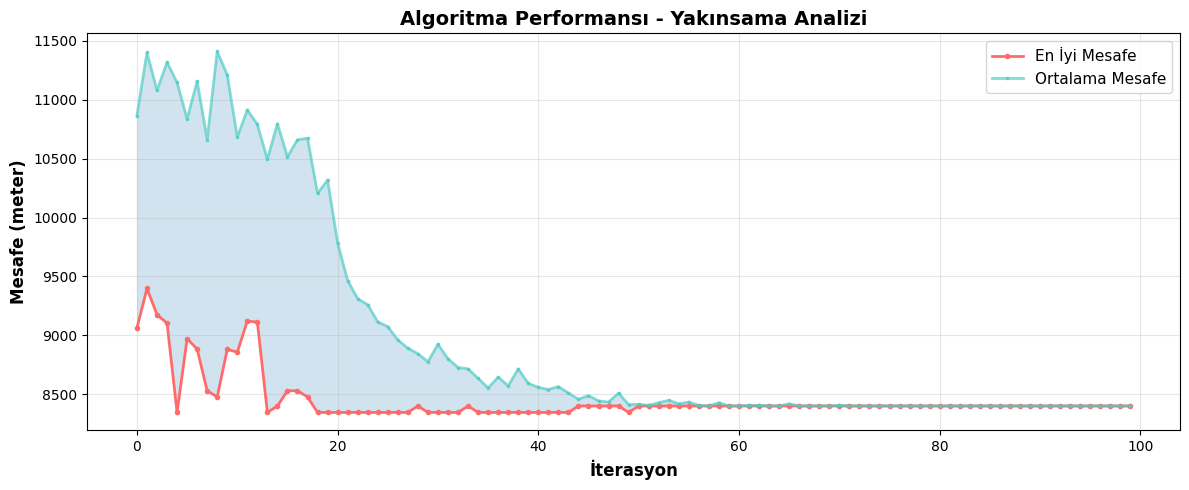

 Yakınsama grafiği gösterildi!


In [18]:
# Yakınsama grafiği
plt.figure(figsize=(12, 5))

iterations = range(len(best_dists))

plt.plot(best_dists, label="En İyi Mesafe", linewidth=2, color='#FF6B6B', marker='o', markersize=3)
plt.plot(avg_dists, label="Ortalama Mesafe", linewidth=2, color='#4ECDC4', alpha=0.7, marker='s', markersize=2)
plt.fill_between(iterations, best_dists, avg_dists, alpha=0.2)

plt.xlabel("İterasyon", fontsize=12, fontweight='bold')
plt.ylabel("Mesafe (meter)", fontsize=12, fontweight='bold')
plt.title("Algoritma Performansı - Yakınsama Analizi", fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f" Yakınsama grafiği gösterildi!")

---

## 9️ Rota Haritası

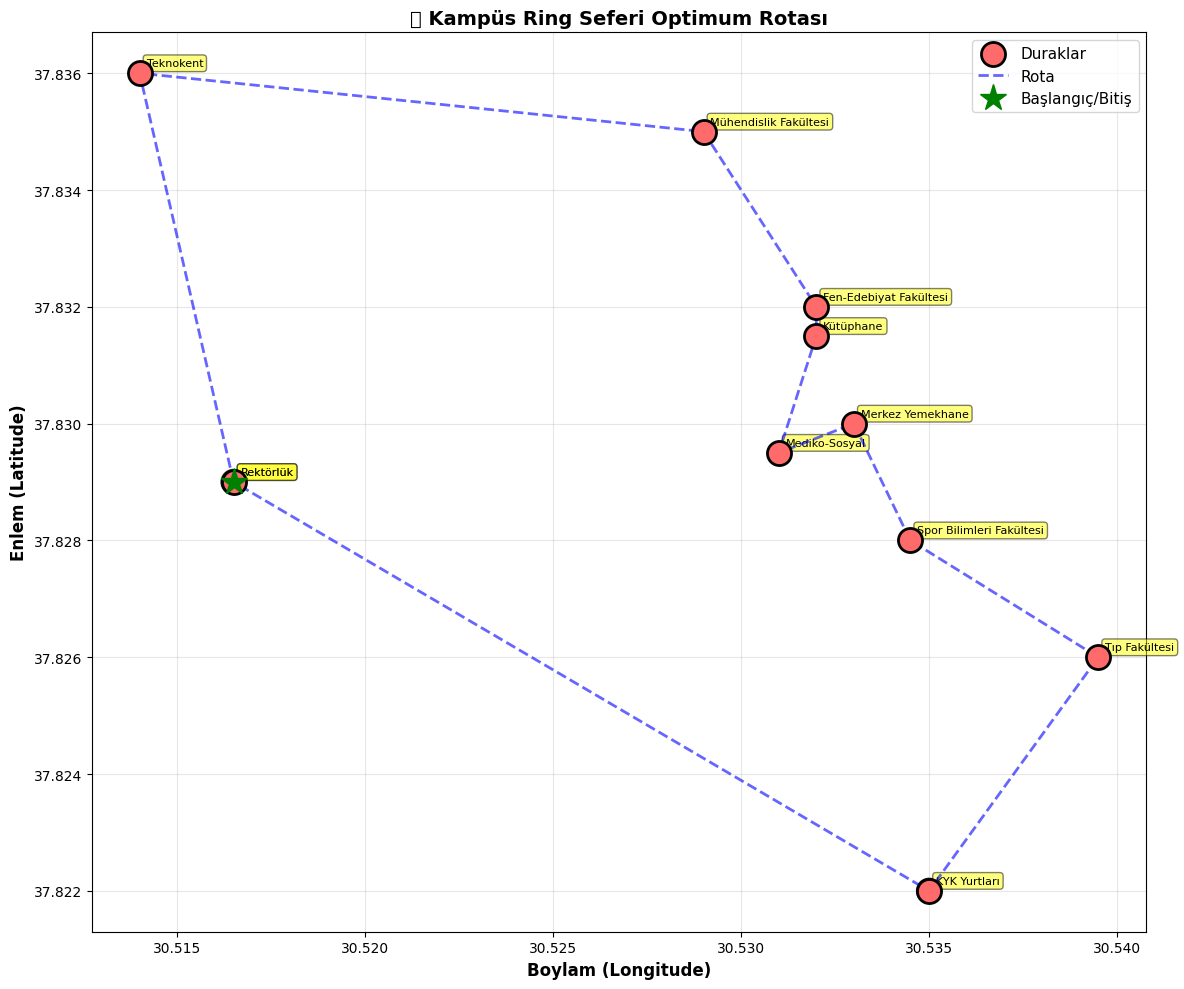

 Harita gösterildi!


In [19]:
# Rota haritası
plt.figure(figsize=(12, 10))

# Duraklar
plt.scatter(coords[:, 1], coords[:, 0], c='#FF6B6B', s=300, 
           zorder=5, edgecolors='black', linewidth=2, label='Duraklar')

# Ziyaret sırası
for i, node_idx in enumerate(best_path):
    order = i + 1
    # Sıra numarası
    plt.annotate(f"{order}", (coords[node_idx, 1], coords[node_idx, 0]), 
               fontsize=9, fontweight='bold', ha='center', va='center',
               color='white', bbox=dict(boxstyle='circle', facecolor='#2C3E50', alpha=0.8))
    
    # Durak adı
    plt.annotate(names[node_idx].split('. ')[1], (coords[node_idx, 1], coords[node_idx, 0]), 
               xytext=(5, 5), textcoords='offset points',
               fontsize=8, bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))

# Rotayı çiz
path_coords = coords[best_path]
plt.plot(path_coords[:, 1], path_coords[:, 0], 'b--', alpha=0.6, 
        linewidth=2, label='Rota', zorder=3)

# Başlangıç/Bitiş
plt.plot(coords[best_path[0], 1], coords[best_path[0], 0], 
        'g*', markersize=20, label='Başlangıç/Bitiş', zorder=6)

plt.xlabel("Boylam (Longitude)", fontsize=12, fontweight='bold')
plt.ylabel("Enlem (Latitude)", fontsize=12, fontweight='bold')
plt.title("🗺️ Kampüs Ring Seferi Optimum Rotası", fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f" Harita gösterildi!")

---

##  Sonuç ve Bulgular

In [20]:
print("\n" + "="*80)
print(" SONUÇ VE BULGULAR")
print("="*80)

print(f"""
 OPTİMUM ROTA BAŞARIYLA BULUNDU

 Algoritma Performansı:
  • Başlangıçtaki Mesafe: {best_dists[0]/1000:.2f} km
  • Son İterasyon Mesafesi: {best_dists[-1]/1000:.2f} km
  • İyileşme Oranı: {((best_dists[0] - best_dists[-1])/best_dists[0]*100):.1f}%
  • Optimum Mesafe: {min_distance/1000:.2f} km

 Algoritma Parametreleri:
  • Karınca Sayısı: {params['n_ants']}
  • İterasyon Sayısı: {params['n_iterations']}
  • Alpha (Feromon): {params['alpha']}
  • Beta (Mesafe): {params['beta']}
  • Buharlaşma Oranı: {params['evaporation']}

 Ring Seferi Detayları:
  • Toplam Durak Sayısı: 10
  • Ziyaret Edilen Durak: {len(best_path)-1}
  • Ortalama Durak Arası Mesafe: {(min_distance/(len(best_path)-1))/1000:.2f} km
  • Başlangıç/Bitiş Noktası: {names[best_path[0]].split('. ')[1]}

 Çıktı Dosyaları:
  • main.py - Streamlit Uygulaması
  • config.py - Parametre Konfigürasyonu
  • core/ - ACO Algoritması Modülleri
  • README.md - Detaylı Dokümantasyon
  • .ipynb - Bu Jupyter Notebook

""")
print("="*80)


 SONUÇ VE BULGULAR

 OPTİMUM ROTA BAŞARIYLA BULUNDU

 Algoritma Performansı:
  • Başlangıçtaki Mesafe: 9.06 km
  • Son İterasyon Mesafesi: 8.40 km
  • İyileşme Oranı: 7.3%
  • Optimum Mesafe: 8.35 km

 Algoritma Parametreleri:
  • Karınca Sayısı: 30
  • İterasyon Sayısı: 100
  • Alpha (Feromon): 1.0
  • Beta (Mesafe): 2.0
  • Buharlaşma Oranı: 0.3

 Ring Seferi Detayları:
  • Toplam Durak Sayısı: 10
  • Ziyaret Edilen Durak: 10
  • Ortalama Durak Arası Mesafe: 0.83 km
  • Başlangıç/Bitiş Noktası: Rektörlük

 Çıktı Dosyaları:
  • main.py - Streamlit Uygulaması
  • config.py - Parametre Konfigürasyonu
  • core/ - ACO Algoritması Modülleri
  • README.md - Detaylı Dokümantasyon
  • .ipynb - Bu Jupyter Notebook




---

##  Referanslar

1. **Karınca Kolonisi Algoritması**
   - Dorigo, M., & Stützle, T. (2004). Ant Colony Optimization.
   - URL: https://en.wikipedia.org/wiki/A

2. **Google Maps API**
   - URL: https://developers.google.com/maps/documentation/distance-matrix

3. **Streamlit Documentation**
   - URL: https://docs.streamlit.io/

---

## 🔗 İlgili Dosyalar

- **GitHub Repository:** [aco_yol_optimizasyonu](https://github.com/kullanici_adi/aco_yol_optimizasyonu)
- **Streamlit Uygulaması:** `main.py`
- **Konfigürasyon:** `config.py`
- **Dokümantasyon:** `README.md`